In [8]:
import skimage
from mde.data.mono_dataset import KITTIRAWDataset
from mde.data.utils import generate_depth_map
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader

# depth_gt=generate_depth_map('/app/data/data_depth_annotated/2011_09_26','/app/data/data_depth_annotated/2011_09_26/2011_09_26_drive_0009_sync/velodyne_points/data/0000000000.bin')
# print(depth_gt.shape)
# plt.imshow(depth_gt)



dataset = KITTIRAWDataset('/app/data/data_depth_annotated/2011_09_26',
                                            375,1242,
                                           [0,1], 4, is_train=True)
dataloader = DataLoader(dataset, 16, shuffle=True, num_workers=12,
                                pin_memory=True, drop_last=False)

In [9]:
e=dataset[1]

In [10]:
e.keys()

dict_keys([('K', 0), ('inv_K', 0), ('K', 1), ('inv_K', 1), ('K', 2), ('inv_K', 2), ('K', 3), ('inv_K', 3), ('color', 0, 0), ('color', 0, 1), ('color', 0, 2), ('color', 0, 3), ('color', 1, 0), ('color', 1, 1), ('color', 1, 2), ('color', 1, 3), ('color_aug', 0, 0), ('color_aug', 0, 1), ('color_aug', 0, 2), ('color_aug', 0, 3), ('color_aug', 1, 0), ('color_aug', 1, 1), ('color_aug', 1, 2), ('color_aug', 1, 3), 'depth_gt'])

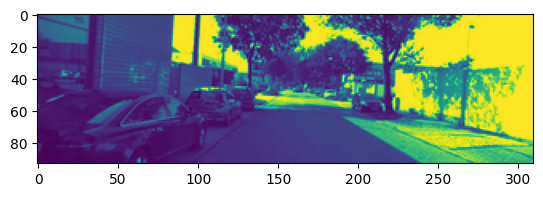

In [12]:
plt.imshow(e[('color',0,2)][2,:,:])

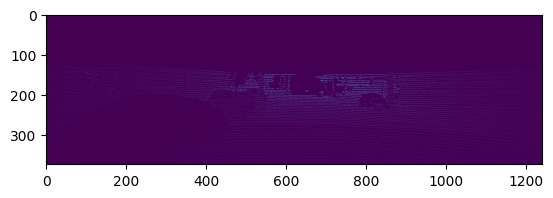

In [7]:
plt.imshow(e['depth_gt'].squeeze(0))

In [25]:
from glob import glob
import math
import random
paths = glob('/app/data/data_depth_annotated/2011_09_26/*/')
tracks = set([int(i.split('/')[-2].split('_')[-2]) for i in paths])
trackf=tracks
dataset_len=len(tracks)
train = random.choices(list(tracks), k=math.ceil((dataset_len/10)*8))
tracks = tracks-set(train)
test = random.choices(list(tracks), k=dataset_len//10)
val = tracks-set(test)


In [22]:
dataset_len/10*7

10.5

In [35]:
!pip3 install torchinfo

In [36]:
import torch
from torchinfo import summary

In [41]:
from torchvision import models
import torch.nn as nn
model = models.resnet50(pretrained=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100.0%


In [42]:
layers = (list(model.children())[:-1])
layers.append(nn.Flatten())
vec_model = nn.Sequential(*layers)
summary(vec_model, input_size=(16, 3, 224, 224), row_settings=("depth", "ascii_only"))

Layer (type:depth-idx)                   Output Shape              Param #
Sequential                               [16, 2048]                --
+ Conv2d: 1-1                            [16, 64, 112, 112]        9,408
+ BatchNorm2d: 1-2                       [16, 64, 112, 112]        128
+ ReLU: 1-3                              [16, 64, 112, 112]        --
+ MaxPool2d: 1-4                         [16, 64, 56, 56]          --
+ Sequential: 1-5                        [16, 256, 56, 56]         --
|    + Bottleneck: 2-1                   [16, 256, 56, 56]         --
|    |    + Conv2d: 3-1                  [16, 64, 56, 56]          4,096
|    |    + BatchNorm2d: 3-2             [16, 64, 56, 56]          128
|    |    + ReLU: 3-3                    [16, 64, 56, 56]          --
|    |    + Conv2d: 3-4                  [16, 64, 56, 56]          36,864
|    |    + BatchNorm2d: 3-5             [16, 64, 56, 56]          128
|    |    + ReLU: 3-6                    [16, 64, 56, 56]          --
| 